# Generate images by color nearness

Inspired by https://codegolf.stackexchange.com/questions/22144/images-with-all-colors:

Create an image from a list of colors where every color is used exactly once.
The original challenge started from the list of 32768 15-bit colors to create a 256 x 128 image.

I've adapted my original solution to optionally take the list of colors from another image. 
Any duplicate colors in the list are kept; the generated image will have colors in the same distribution as the original source.

My solution is similar to [this submission](https://codegolf.stackexchange.com/a/22326) by user fejesjoco, though it's not the same.
I pick a initial pixel and color (possibly by random), then place each subsequent color such that it's nearest to the colors of its filled neighbors. 
The "neighbor distance" metric is the minimum distance from my filled neighbors.

I cheat a bit; the generated image will be the same size as its source (256 x 128 in the 15-bit color case), then I resize to the desired size using `Image.resize()` with Image.Resampling.NEAREST to upsample while preserving the original list of colors. Using the default resampling filter (BICUBIC) produces lovely smoothed images, but obscures the properties of the original algorithm.



In [1]:
from PIL import Image
from numpy.random import default_rng
from IPython.display import display

from generators.nearcolors import nearcolors_image
from generators.genutils import ShapeConverter

# Generate from all 15-bit colors
## Start from a random point

This takes a little over 2 minutes.

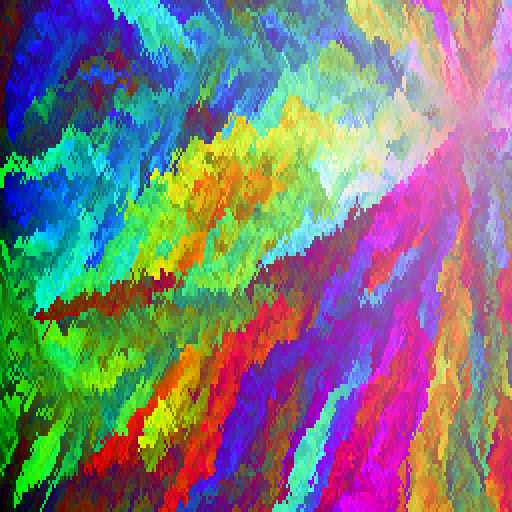

In [2]:
WIDTH = 256
HEIGHT = 128
N = WIDTH*HEIGHT

rng = default_rng(2024)
p0 = rng.integers(0, N, size=1)[0]

image = nearcolors_image(seed_point=p0, width=512, height=512, rng=rng)
display(image)
image.save("generatedimages/allcolors_random_start.png")

## Start from the top left corner

Also about 2 minutes

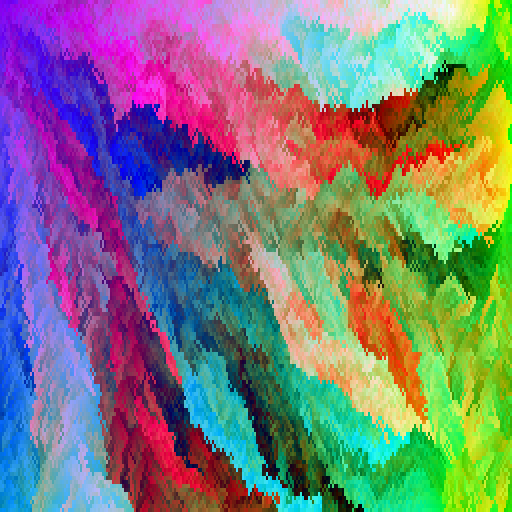

In [3]:
image = nearcolors_image(seed_point=0, width=512, height=512, rng=rng)
display(image)
image.save("generatedimages/allcolors_topleft_start.png")

## Start from the center (of the base image size)

This took about 6 minutes.

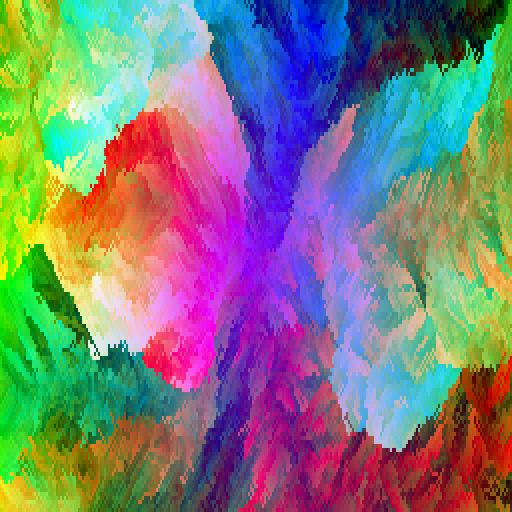

In [4]:
x = int(WIDTH/2)
y = int(HEIGHT/2)
p0 = ShapeConverter().coords_to_index((x, y))

image = nearcolors_image(seed_point=p0, width=512, height=512, rng=rng)
display(image)
image.save("generatedimages/allcolors_center_start.png")

# Generate from source images

Both of these will have a random start. I'm using the smallest versions of the images to keep the computation down.

Images:

* *Old Kahala Home*, Arman Manookian (1928). Source: [WikiArt](https://www.wikiart.org/en/arman-manookian/old-kahala-home-1928).
* *Greeting by Chiefs*, Arman Manookian (1928) Source: [WikiArt](https://www.wikiart.org/en/arman-manookian/greeting-by-chiefs-1928)

In [5]:
kahala_img = "sourceimages/old-kahala-home-1928_210x159.jpg"
chiefs_img = "sourceimages/greeting-by-chiefs-1928_210x148.jpg"

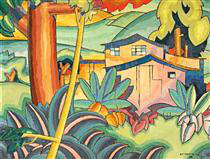

In [6]:
oimage = Image.open(kahala_img)
display(oimage)

This took about 5 minutes

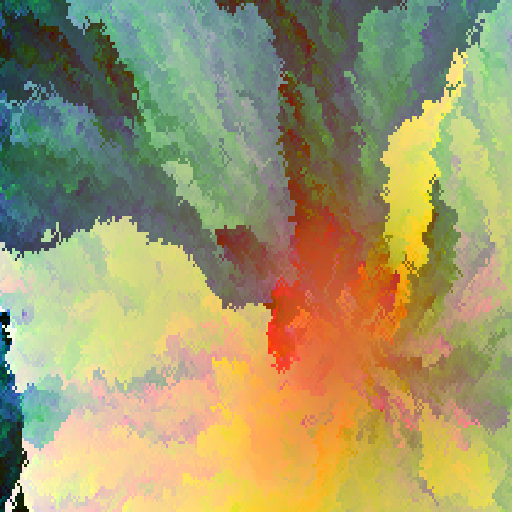

In [7]:
rng = default_rng(20240524)

newimage = nearcolors_image(imgfile=kahala_img, width=512, height=512, rng=rng)
display(newimage)
newimage.save("generatedimages/kahala_random_start.png")

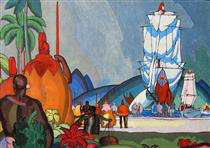

In [8]:
oimage = Image.open(chiefs_img)
display(oimage)

Also about 4 minutes.

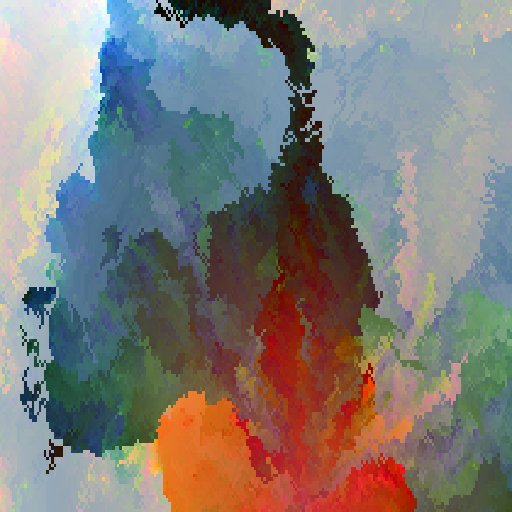

In [9]:
newimage = nearcolors_image(imgfile=chiefs_img, width=512, height=512, rng=rng)
display(newimage)
newimage.save("generatedimages/chiefs_random_start.png")